In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Work\DataFrames\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Маленький EDA

In [4]:
len(df)

10000

In [5]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [8]:
df['Exited'].mean()

0.2037

## Обучающая, валидационная и тестовая выборка

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])

In [11]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])

#### НУЖНО, ЧТОБЫ ПАРАМЕТР EXITED был везде одинаков, так как на этом параметре строится задача классификации. 
#### ПОМОГАЕТ В ЭТОМ ПАМЕТР stratify

In [12]:
train['Exited'].mean()

0.20366666666666666

In [13]:
val['Exited'].mean()

0.204

In [14]:
test['Exited'].mean()

0.2035

## Phik

In [15]:
train_full = pd.concat([train,val])

In [16]:
! pip install phik

In [17]:
import phik

In [18]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


C:\anaconda\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [19]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Человеческое обучение

In [20]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


Эта переменная может помочь, почему идет отток пользователь. Как видим, с количеством товаров 1 склонность 27%

In [21]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [22]:
model = model.rename({'Exited':'score_prod'},axis=1)

In [23]:
train_full = train_full.merge(model,how='left',on='NumOfProducts')

In [24]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


Выберем отсечение :)

## Baseline

In [25]:
train_full['score_mean'] = train_full['Exited'].mean()

In [26]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [27]:
from sklearn.metrics import log_loss

In [28]:
log_loss(train_full['Exited'],train_full['score_mean'])

0.5055572860042145

In [29]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359616823203511

## Uplift

In [30]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


In [31]:
train_full['Exited'].mean()

0.20375

In [32]:
train_full['Exited'].sample(frac=0.5,random_state=42).mean()

0.20675

In [33]:
exited_all = train_full['Exited'].sum()

In [34]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum()

337

In [35]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum() / exited_all

0.2067484662576687

In [36]:
train_full = train_full.sort_values('score_prod',ascending=False)

In [37]:
round(len(train_full) * 0.2)

1600

In [38]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() 

583

Метрика: тут 35%

In [39]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

0.3576687116564417

In [40]:
0.3588957055214724 / 0.2067484662576687

1.7359050445103856

# Шум

Шум я добавляю, чтобы получить уникальную сортировку. А она нужна чтобы при перезапуске uplift не менялся. У нас там очень много одинаковых скоров, и когда ты сортируешь одинаковые значения, то их можно расставлять в любом порядке. Шум добавляет уникальность каждому скору, и мы можем получать четкую сортировку.

In [41]:
import numpy as np

In [42]:
np.random.seed(42) #фиксируем случайность
shum = np.random.uniform(0,0.001,size=len(train_full))

In [43]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - shum

In [44]:
train_full['score_prod'].nunique()

8000

# Функция для uplift

In [45]:
def uplift(df,score,pct):
    exited_all = df['Exited'].sum()
    df = df.sort_values(score, ascending=False)
    exited_found = df.head(round(len(df) * pct))['Exited'].sum()
    return (exited_found / exited_all) / pct

In [46]:
uplift(train_full,'score_prod',0.2)

1.9079754601226995

In [47]:
test = test.merge(model,how='left',on='NumOfProducts')

In [48]:
np.random.seed(42) #фиксируем случайность
shum = np.random.uniform(0,0.001,size=len(test))

In [49]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - shum

In [50]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359717821616623

In [51]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [52]:
uplift(test,'score_prod',0.2)

1.8427518427518426

# Добавим возраст

In [53]:
import matplotlib.pyplot as plt

<AxesSubplot:>

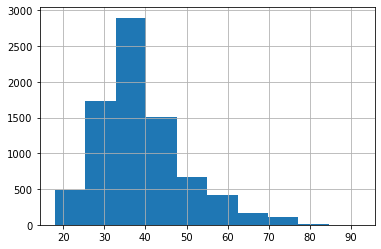

In [54]:
train_full['Age'].hist()

In [59]:
pd.qcut(train_full['Age'],5,retbins=True,labels=False)

(6946    4
 1245    2
 7056    4
 7847    4
 693     3
        ..
 1742    1
 4912    4
 4913    2
 4914    3
 0       2
 Name: Age, Length: 8000, dtype: int64,
 array([18., 31., 35., 40., 46., 92.]))

In [57]:
train_full['age_group'] = pd.cut(train_full['Age'],[0,31,35,40,46,float('inf')])

In [58]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [61]:
model = train_full.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()

In [62]:
model = model.rename({'Exited':'score_prod_age'},axis=1)

In [63]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [64]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group'])

In [65]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375,"(46.0, inf]",1.0
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375,"(35.0, 40.0]",1.0
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375,"(46.0, inf]",1.0
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375,"(46.0, inf]",1.0
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375,"(40.0, 46.0]",1.0


In [66]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359717821616623

In [67]:
uplift(train_full,'score_prod',0.2)

1.9079754601226995

In [68]:
log_loss(train_full['Exited'],train_full['score_prod_age'])

0.3866695862492173

In [69]:
uplift(train_full,'score_prod_age',0.2)

2.7116564417177913

In [70]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [71]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group'])

In [72]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [73]:
uplift(test,'score_prod',0.2)

1.8427518427518426

In [74]:
log_loss(test['Exited'],test['score_prod_age'])

0.3870707514157596

In [75]:
uplift(test,'score_prod_age',0.2)

2.7518427518427515

## Добавим IsActiveMember

In [76]:
train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [77]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [79]:
model =  train_full.groupby(['NumOfProducts','age_group','IsActiveMember'])['Exited'].mean().reset_index()

In [80]:
model = model.rename({'Exited':'score_prod_age_active'},axis=1)

In [81]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [82]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [83]:
def print_metrics(df,score):
    print(log_loss(df['Exited'],df[score]))
    print(uplift(df,score,0.2))

In [84]:
print_metrics(train_full,'score_prod_age')

0.3866695862492173
2.7116564417177913


In [85]:
print_metrics(test,'score_prod_age')

0.3870707514157596
2.7518427518427515


In [86]:
print_metrics(train_full,'score_prod_age_active')

0.36550197514510024
2.8496932515337425


In [87]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.862407862407862


# Машинное обучение

In [88]:
from catboost import CatBoostClassifier

In [89]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

Обучим машину на тех фичах, что мы проводили человеческое обучение

In [91]:
X = ['NumOfProducts','Age','IsActiveMember']
y = ['Exited']

In [92]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [93]:
model = CatBoostClassifier(**params)

In [94]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 159ms	remaining: 2m 38s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 486ms	remaining: 4.32s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 784ms	remaining: 3.12s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.09s	remaining: 2.54s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.37s	remaining: 2.05s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.66s	remaining: 1.66s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.94s	remaining: 1.29s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 2.22s	remaining: 949ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.52s	remaining: 628ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.87s	remaining: 315ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 3.21s	remaining: 0us

bestTest = 0.3

In [96]:
model.predict_proba(test[X])

array([[0.87273278, 0.12726722],
       [0.83992875, 0.16007125],
       [0.76421314, 0.23578686],
       ...,
       [0.85243229, 0.14756771],
       [0.96002386, 0.03997614],
       [0.95396298, 0.04603702]])

Два score, нам нужен скор на отток

In [97]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [98]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [99]:
test['score_cat_prod_age_active'].nunique()

254

In [100]:
len(test)

2000

In [101]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.862407862407862


In [102]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


# Обучимся на всех фичах

In [103]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [104]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [105]:
train.select_dtypes(include='object')

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [106]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']

https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview

In [108]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [109]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}


In [110]:
model = CatBoostClassifier(**params)

In [111]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 56.2ms	remaining: 56.1s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 4.2s	remaining: 37.4s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 8.49s	remaining: 33.8s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 12.6s	remaining: 29.3s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 17s	remaining: 25.4s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 21.2s	remaining: 21.1s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 25.6s	remaining: 17s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 30s	remaining: 12.8s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 34s	remaining: 8.45s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 37.9s	remaining: 4.16s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 42.2s	remaining: 0us

bestTest = 0.3185003702

In [112]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [113]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


In [114]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


# Feature importances

In [115]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [116]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

Видим, что фик правильно предположил

# Shap

In [118]:
import shap
shap.initjs()

In [119]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

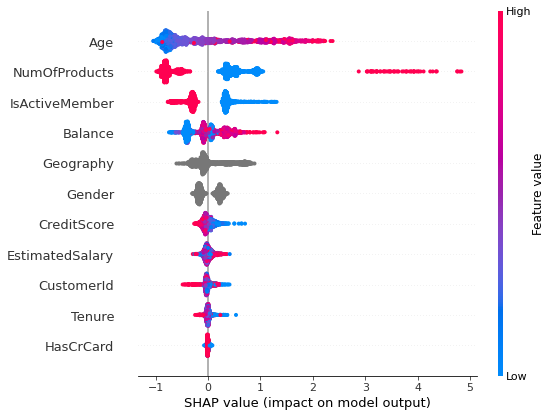

In [120]:
shap.summary_plot(shap_values, test[X])

In [121]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


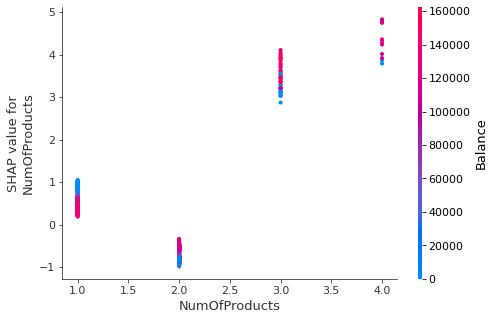

In [122]:
shap.dependence_plot("NumOfProducts", shap_values, test[X])

In [123]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

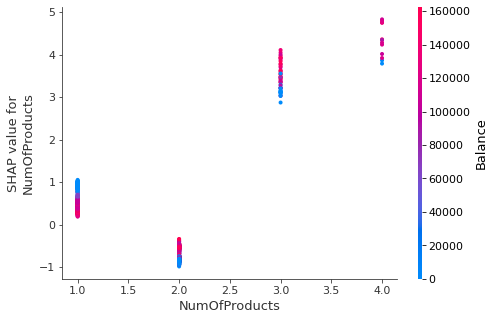

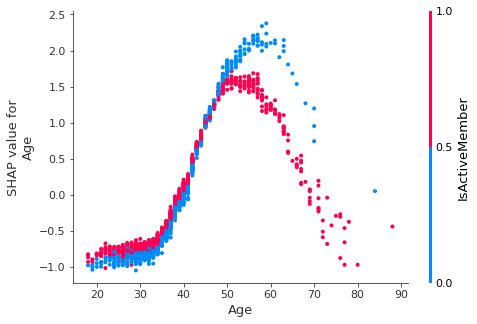

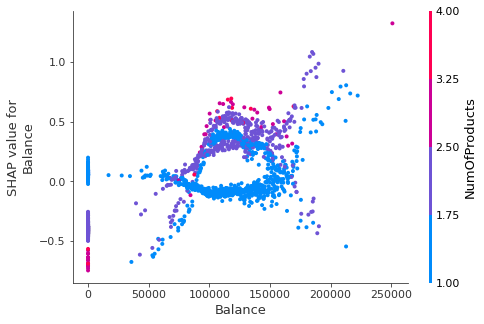

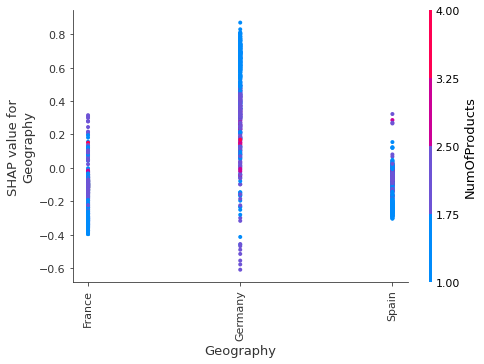

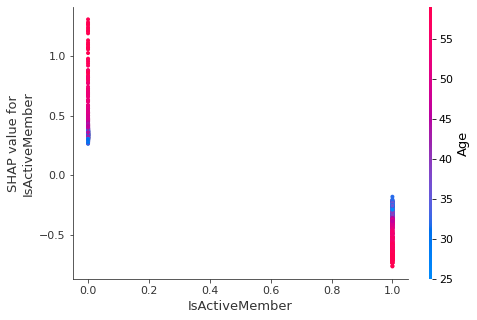

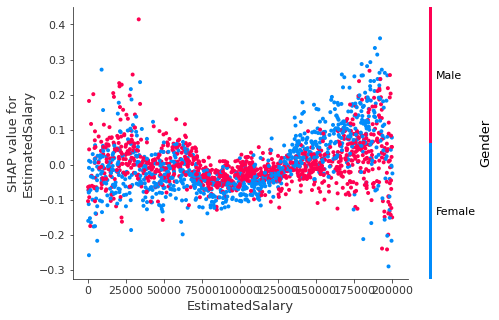

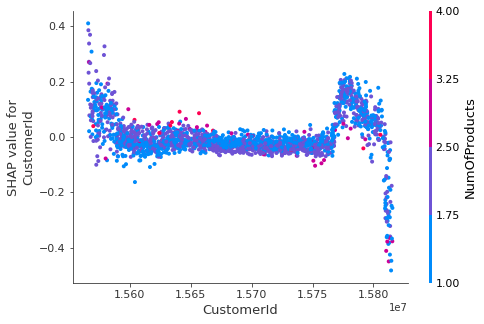

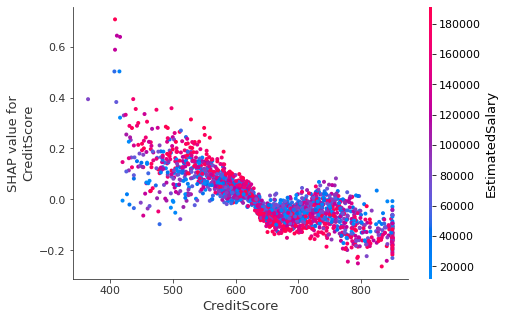

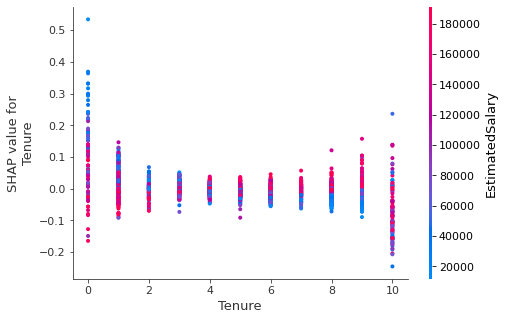

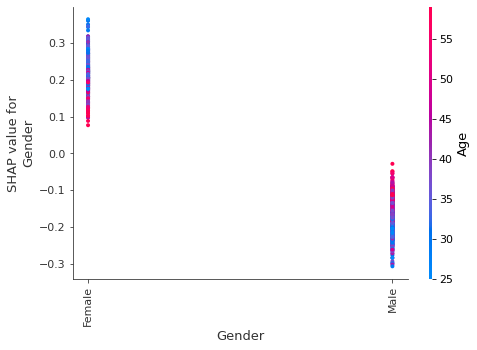

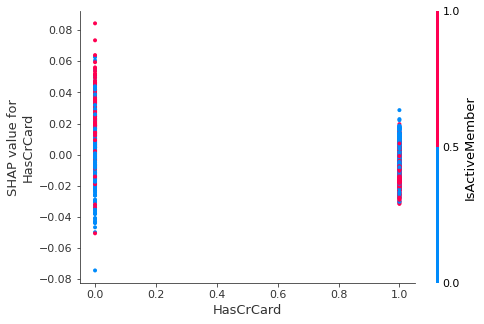

In [124]:
for feature in features:
    shap.dependence_plot(feature, shap_values, test[X])

# Классификция == Регрессия (технически)

In [125]:
model.predict(test[X],prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

<AxesSubplot:>

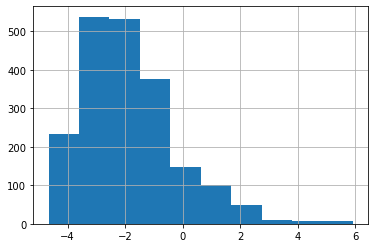

In [126]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).hist()

In [127]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [128]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).apply(sigmoid)

0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

In [129]:
model.predict_proba(test[X])

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [130]:
model.predict(test[X],prediction_type='Probability')

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])